<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Neural networks with SKlearn**


Estimated time needed: **30** minutes

In this lab, we will be implementing neural networks for a real-world task (ditgit recognition) using the **Multi-layer Perceptron (MLP)** classifier from scikit-learn.



## Table of Contents

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>       
    </li>
    <li><a href="https://#Background">Background</a></li>
    <li><a href="#Example: Digit Recognition with Multi-layer Perceptron">Example: Digit Recognition with Multi-layer Perceptron</a></li>
    
</ol>



## Objectives

After completing this lab you will be able to:

*   Apply MLP for classification tasks
*   Use RandomizedSearchCV to search for an optimal set of model parameters  


## Setup


For this lab, we will be using the following libraries:

*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`Pillow`](https://pillow.readthedocs.io/en/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for image processing functions.
*   [`OpenCV`](https://docs.opencv.org/4.x/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for other image processing functions.
*   [`tensorflow`](https://www.tensorflow.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and neural network related functions.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook command in a different Jupyter environment (like Watson Studio or Anaconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the following code cell.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy numpy==1.22.3 matplotlib==3.5.1 tensorflow==2.9.0 opencv-python==4.5.5.62

# Note: If your environment doesn't support "!mamba install", use "!pip install --user"

# RESTART YOUR KERNEL AFTERWARD AS WELL

### Importing Required Libraries

*We recommend you import all required libraries in one place (here):*


In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


## Background


The scikit-learn library is well-known for providing robust and efficient tools for Machine Learning and Statistical Learning such as regression, classification, and clustering. It also contains an interface that allows us to work with neural networks, which is the **Multi-layer Perceptron (MLP)** class.

A Multilayer Perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes: an input layer, a hidden layer, and an output layer. Except for the input layer, each layer contains nodes (neurons) that use nonlinear activation functions such as ReLu to learn complex and abstract features in the input.

Class **MLPClassifier** utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish a MLP model from a linear model, as it can distinguish data that is not linearly separable.

Note that Multilayer perceptrons are sometimes referred to as "vanilla" neural networks, especially when they have a single hidden layer. 

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/Artificial_neural_network.svg" width="50%"></center>

<center>Illustration of One hidden layer MLP</center>


## Example: Digit Recognition with Multi-layer Perceptron

In this example, you will implement a simple neural network using scikit-learn's **MLPClassifier** function. The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images from [kaggle](https://www.kaggle.com/code/cezaryszulc/sklearn-simple-neural-network/notebook?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01).

Let's download the digits dataset and display a few images!


In [3]:
digits = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/digits.csv")

labels = digits['label']
digits = np.array(digits.drop('label', axis=1)).astype('float')
digits.shape, labels.shape

((42000, 784), (42000,))

There are 42,000 digit images and each has 784 pixels, which means we can reshape them into $28\times28$ images for displaying.


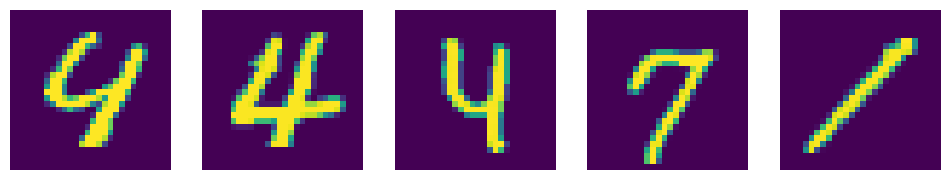

In [4]:
plt.figure(figsize=(12,4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random.choice(digits).reshape(28,28))
    plt.axis("off")

Let's split the 42,000 images into train and test sets.


In [5]:
split = 0.7, 0.3 # train, test
# normalize data
digits /= 255.0

split_ind = int(len(digits)*split[0])
X_train, X_test, y_train, y_test = digits[:split_ind], digits[split_ind:], labels[:split_ind], labels[split_ind:]
X_train.shape, X_test.shape

((29399, 784), (12601, 784))

With scikit-learn's **MLPClassifier**, we can utilize the GridSearch cross validation method to optimize the following parameters:

- **hidden_layer_sizes: _tuple, length = n_layers - 2, default=(100,)_**. The ith element represents the number of neurons in the ith hidden layer.

- **alpha: _float, default=0.0001_**. Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

- **max_iter: _int, default=200_**. Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

- **learning_rate_init: _float, default=0.001_**. The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.


Before we search for an optimal set of parameters, let's start with a vanilla MLPClassifier:


In [6]:
model = MLPClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

Using MLPClassifier with the default parameter values gives an accuracy of 0.9675422585509087


In [7]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1270
           1       0.99      0.97      0.98      1434
           2       0.97      0.97      0.97      1230
           3       0.94      0.98      0.96      1259
           4       0.98      0.94      0.96      1237
           5       0.96      0.97      0.96      1126
           6       0.98      0.98      0.98      1231
           7       0.97      0.97      0.97      1327
           8       0.96      0.96      0.96      1239
           9       0.94      0.96      0.95      1248

   micro avg       0.97      0.97      0.97     12601
   macro avg       0.97      0.97      0.97     12601
weighted avg       0.97      0.97      0.97     12601



For the cross validation training, we will use the default activation "relu" and default solver "adam". Using **RandomizedSearchCV** instead of **GridSearchCV** reduces the training time because in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The following figure illustrates the difference between the two: 

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L1/data/randomsearch.png" width="65%"></center>

<p style="text-align:center">
<a href="https://dl.acm.org/doi/pdf/10.5555/2188385.2188395?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01"> Source: Random Search for Hyper-Parameter Optimization paper</a>
</p>


As you can see, points in the GridSearch space are evenly distributed; thus projections onto either the important or the unimportant parameter subspace produces the same coverage, which is inefficient as we would want the important parameters to have more coverage in the trials. In contrast, the uneven distribution of points in the RandomSearch space allows the trials to explore many more distinct values in the important parameter space. 

Since it's hard to know ahead of time which parameter subspaces are more important, performing a parameter search on a strict, even grid would not be ideal or efficient.


However, despite the fact that we will use a more efficient search method since we are trying out multiple values for mutiple parameters of a neural network , **you should still expect training time to be much longer than training a single model**.


In [8]:
parameters = {'hidden_layer_sizes':[50, 100, 200],
              'alpha': [0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)
clf.fit(X_train[:3000], y_train[:3000]) # reduce the train set size to shorten the training time

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spec

The best parameter values found are:

{'max_iter': 800, 'learning_rate_init': 0.001, 'hidden_layer_sizes': 200, 'alpha': 0.01}


Now we can use the **bestmodel**, which uses the most optimal set of parameter values found by RandomSearchCV, cross-validated on a subset of the training set, to make predictions for the test set **X_test** and evaluate its performance.

You select the best regularization  method using the validation data.


The accuracy score of the best model is 0.9312752956114594



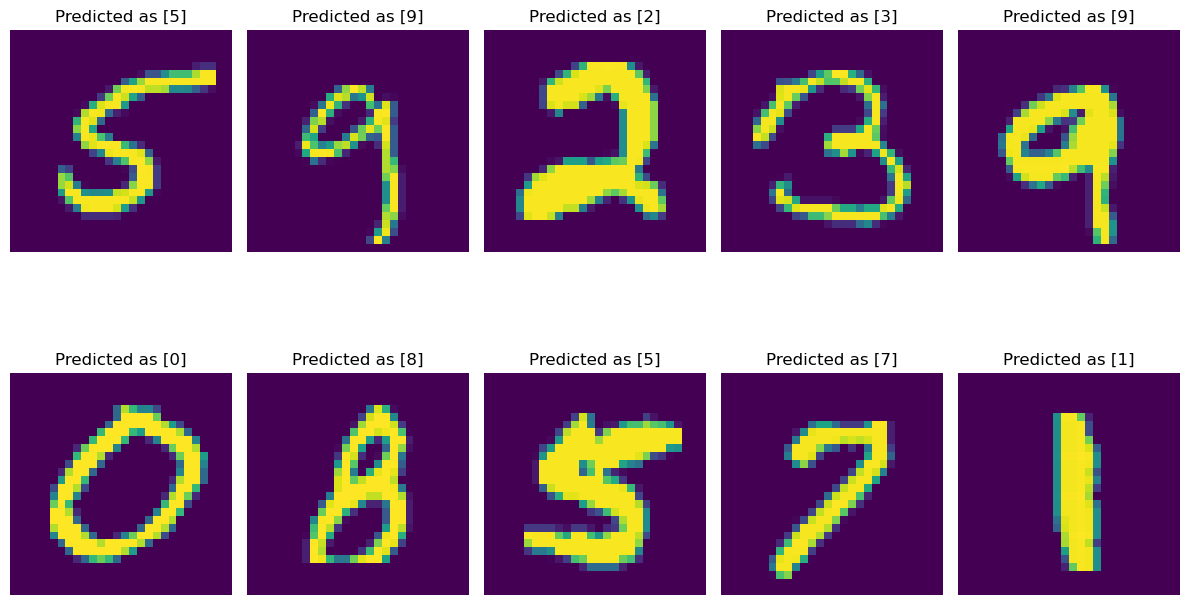

In [9]:
y_pred = bestmodel.predict(X_test)
print(f"The accuracy score of the best model is {accuracy_score(y_test, y_pred)}\n")

plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = random.choice(X_test)
    plt.imshow(sample.reshape(28,28))
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.title(f"Predicted as {pred}")
    plt.axis("off")

plt.tight_layout()

The accuracy of our model is around 93% and the 10 random samples from the test set are all predicted correctly, which is pretty nice. 


## Authors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description |
| ----------------- | ------- | ----------- | ------------------ |
| 2022-07-07        | 0.1     | Roxanne Li  | Created Lab       |
| 2022-09-06        | 0.1     | Steve Hord  | QA pass edits     |


Copyright © 2022 IBM Corporation. All rights reserved.
